<a href="https://colab.research.google.com/github/emh0841-code/Final-Team9/blob/main/10%EC%9B%941%EC%9D%BC%20%EC%B5%9C%EC%A2%85)%EC%9E%A5%EB%A5%B4%EC%97%90_%EB%94%B0%EB%A5%B8_%ED%9D%A5%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

# 표에서 ('-') 마이너스 표시
plt.rcParams['axes.unicode_minus'] = False

# 필요한 라이브러리 임포트
import pandas as pd # 데이터 분석 라이브러리
import numpy as np
import matplotlib.pyplot as plt # 시각화 도구 라이브러리1
import seaborn as sns # 시각화 도구 라이브러리2

In [ ]:
df = pd.read_csv("/content/movies_genres_ohe.csv", on_bad_lines='skip')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, f_oneway, kruskal

df.columns = df.columns.str.strip()

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"] = df["release_date"].dt.year

df = df[(df["year"] >= 1990) & (df["year"] <= 2025)].copy()


bins   = list(range(1990, 2030, 5))
labels = [f"{y}–{y+4}" for y in bins[:-1]]
df["period"] = pd.cut(df["year"], bins=bins, labels=labels, right=True, include_lowest=True)


cols = df.loc[:, "Action":"Western"].columns.tolist()


col_counts = df[cols].sum().sort_values(ascending=False)
print("[1990~2025] 장르별 전체 편수:\n", col_counts, "\n")

period_genre = {}
for c in cols:
    period_genre[c] = df.loc[df[c] == 1].groupby("period")["y_result"].mean()

period_genre = pd.DataFrame(period_genre).sort_index()
print("5년 단위 × 장르별 평균 y_result (1990~2025):")
print(period_genre, "\n")





[1990~2025] 장르별 전체 편수:
 Drama              3079
Comedy             2376
Thriller           1760
Action             1744
Adventure          1187
Romance            1174
Crime              1039
Family              737
Horror              736
Science Fiction     696
Fantasy             696
Mystery             575
Animation           418
History             361
War                 212
Music               197
Documentary          75
Western              72
TV Movie              7
dtype: int64 

5년 단위 × 장르별 평균 y_result (1990~2025):
             Action  Adventure  Animation    Comedy     Crime  Documentary  \
period                                                                       
1990–1994  1.208092   1.297030   1.047619  1.093117  1.070423     2.000000   
1995–1999  1.114286   1.422764   1.500000  1.117284  1.142857     0.600000   
2000–2004  1.071161   1.396341   1.553191  1.174242  1.000000     1.555556   
2005–2009  1.152597   1.256410   1.469880  1.118126  0.989848     1.153846   


/tmp/ipython-input-3746974749.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_genre[c] = df.loc[df[c] == 1].groupby("period")["y_result"].mean()


In [ ]:
from scipy.stats import shapiro, levene, f_oneway, kruskal


print("[정규성 검정: Shapiro-Wilk] (1990~2025, 전체 장르)")
normality_results = {}
for c in cols:  # cols = ['Action', ..., 'Western']
    vals = df.loc[df[c] == 1, "y_result"].dropna()
    if len(vals) >= 8:
        stat, p = shapiro(vals)
        normality_results[c] = (stat, p, len(vals))
        print(f"{c:15s} → W={stat:.4f}, p={p:.4e}, n={len(vals)}")
    else:
        print(f"{c:15s} → 샘플 부족 (n={len(vals)})")

groups = [df.loc[df[c] == 1, "y_result"].dropna() for c in cols if len(df.loc[df[c] == 1, "y_result"].dropna()) > 1]
stat, p = levene(*groups)
print(f"\n[등분산성 검정: Levene]\nW={stat:.4f}, p={p:.4e}")

if all(pv > 0.05 for _, pv, _ in normality_results.values()):

    f_stat, p_val = f_oneway(*groups)
    print(f"\n[ANOVA 결과]\nF={f_stat:.4f}, p={p_val:.4e}")
else:
    h_stat, p_val = kruskal(*groups)
    print(f"\n[Kruskal-Wallis 결과]\nH={h_stat:.4f}, p={p_val:.4e}")


[정규성 검정: Shapiro-Wilk] (1990~2025, 전체 장르)
Action          → W=0.8450, p=2.8646e-38, n=1744
Adventure       → W=0.8461, p=1.9944e-32, n=1187
Animation       → W=0.8325, p=1.3704e-20, n=418
Comedy          → W=0.8490, p=6.7137e-43, n=2376
Crime           → W=0.8313, p=9.8873e-32, n=1039
Documentary     → W=0.8033, p=1.2924e-08, n=75
Drama           → W=0.8158, p=1.1662e-50, n=3079
Family          → W=0.8550, p=1.8426e-25, n=737
Fantasy         → W=0.8463, p=2.0400e-25, n=696
History         → W=0.7880, p=2.4090e-21, n=361
Horror          → W=0.8476, p=5.2526e-26, n=736
Music           → W=0.8116, p=1.0895e-14, n=197
Mystery         → W=0.8261, p=1.7092e-24, n=575
Romance         → W=0.8438, p=1.8238e-32, n=1174
Science Fiction → W=0.8369, p=4.4562e-26, n=696
TV Movie        → 샘플 부족 (n=7)
Thriller        → W=0.8354, p=2.8764e-39, n=1760
War             → W=0.8084, p=2.0011e-15, n=212
Western         → W=0.7009, p=8.0630e-11, n=72

[등분산성 검정: Levene]
W=5.3405, p=1.2376e-12

[Kruskal-Wallis 

 2020년대 기준 Top5 장르: ['Horror', 'Animation', 'War', 'Science Fiction', 'Family']


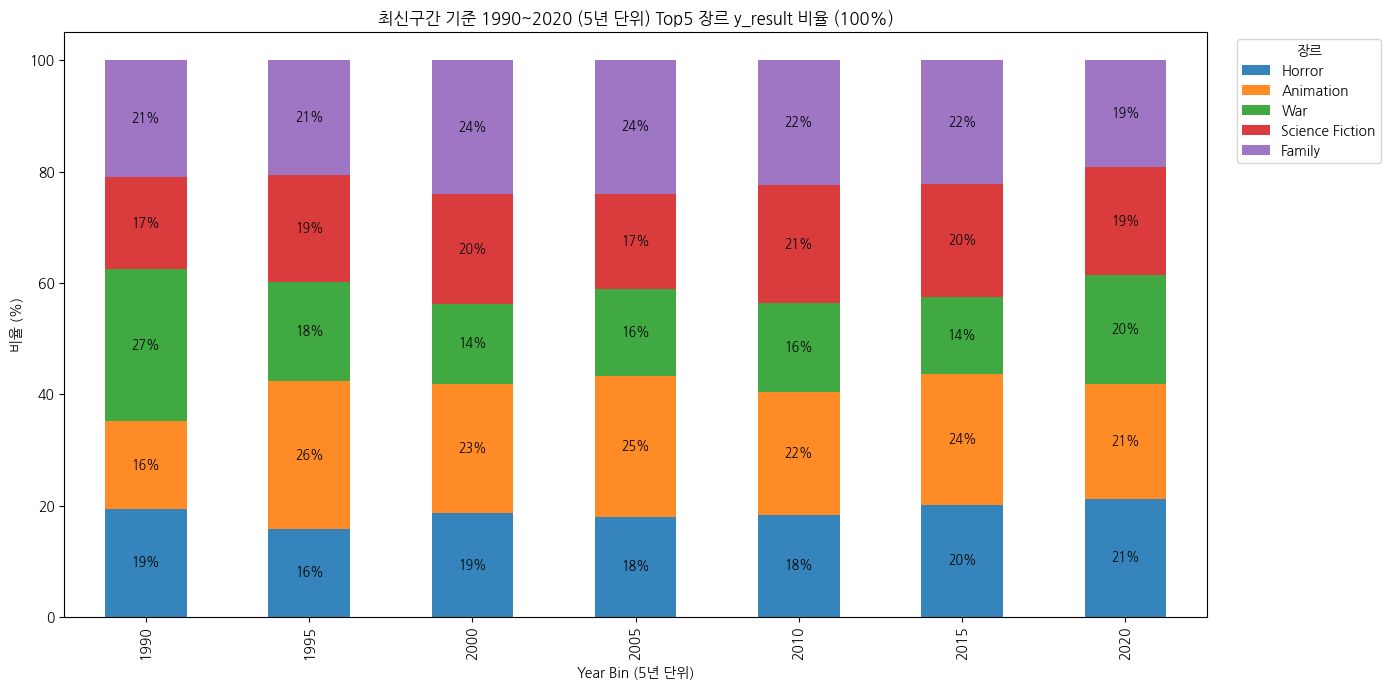

In [ ]:

df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
df = df[df["release_year"].notna()].copy()
df["release_year"] = df["release_year"].astype(int)

df["year_bin"] = (df["release_year"] // 5) * 5


df = df[df["year_bin"] >= 1990].copy()
df.loc[df["release_year"] >= 2025, "year_bin"] = 2025


cols = df.loc[:, "Action":"Western"].columns.tolist()

latest_bin = df["year_bin"].max()

df_latest = df[df["year_bin"] == latest_bin]


genre_mean_latest = {
    c: df_latest.loc[df_latest[c] == 1, "y_result"].mean() for c in cols
}
genre_mean_latest = pd.Series(genre_mean_latest).dropna().sort_values(ascending=False)

top5 = genre_mean_latest.head(5).index.tolist()
print(f" {latest_bin}년대 기준 Top5 장르:", top5)

trend_top5 = {c: df.loc[df[c] == 1].groupby("year_bin")["y_result"].mean() for c in top5}
trend_top5 = pd.DataFrame(trend_top5).sort_index()


trend_top5_pct = trend_top5.div(trend_top5.sum(axis=1).replace(0, np.nan), axis=0) * 100


ax = trend_top5_pct.plot(kind="bar", stacked=True, figsize=(14,7), alpha=0.9)
ax.set_title(f"최신구간 기준 1990~{latest_bin} (5년 단위) Top5 장르 y_result 비율 (100%)")
ax.set_xlabel("Year Bin (5년 단위)")
ax.set_ylabel("비율 (%)")
ax.legend(title="장르", bbox_to_anchor=(1.02, 1), loc="upper left")


for container in ax.containers:
    labels = [f"{h.get_height():.0f}%" if h.get_height() >= 8 else "" for h in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

plt.tight_layout()
plt.show()


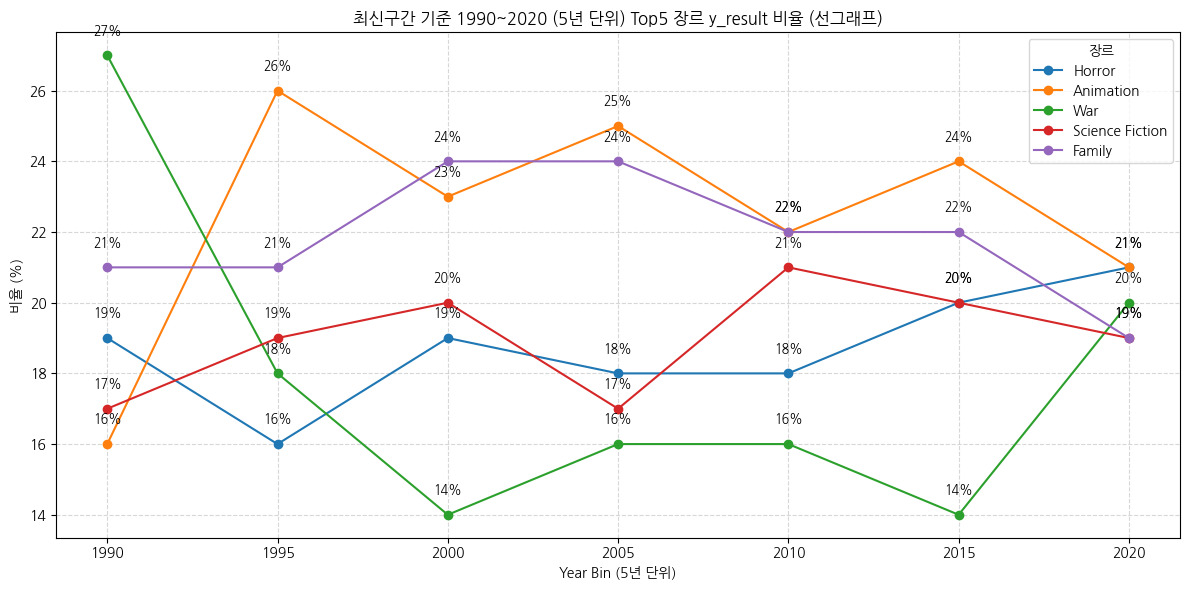

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "Year Bin": [1990, 1995, 2000, 2005, 2010, 2015, 2020],
    "Horror": [19, 16, 19, 18, 18, 20, 21],
    "Animation": [16, 26, 23, 25, 22, 24, 21],
    "War": [27, 18, 14, 16, 16, 14, 20],
    "Science Fiction": [17, 19, 20, 17, 21, 20, 19],
    "Family": [21, 21, 24, 24, 22, 22, 19]
}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(12,6))
for genre in df_plot.columns[1:]:
    plt.plot(df_plot["Year Bin"], df_plot[genre], marker="o", label=genre)

    for x, y in zip(df_plot["Year Bin"], df_plot[genre]):
        plt.text(x, y+0.5, f"{y}%", ha="center", va="bottom", fontsize=9)

plt.title("최신구간 기준 1990~2020 (5년 단위) Top5 장르 y_result 비율 (선그래프)")
plt.xlabel("Year Bin (5년 단위)")
plt.ylabel("비율 (%)")
plt.legend(title="장르")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:


df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"] = df["release_date"].dt.year
df = df[df["year"] >= 1980].copy()

# 3) 5년 단위 구간 생성
bins = list(range(1980, 2025, 5))
labels = [f"{y}–{y+4}" for y in bins[:-1]]
df["five_year_bin"] = pd.cut(df["year"], bins=bins, labels=labels, right=True, include_lowest=True)

genre_cols = [
    'Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family',
    'Fantasy','History','Horror','Music','Mystery','Romance','Science Fiction',
    'TV Movie','Thriller','War','Western'
]
genre_cols = [c for c in genre_cols if c in df.columns]

genre_by_period = df.groupby("five_year_bin")[genre_cols].sum()

print("=== 시대 × 장르별 영화 편수 ===")
print(genre_by_period)




=== 시대 × 장르별 영화 편수 ===
               Action  Adventure  Animation  Comedy  Crime  Documentary  \
five_year_bin                                                             
1980–1984           0          0          0       0      0            0   
1985–1989          23         16          1      31     23            0   
1990–1994         150         85         20     216    119            2   
1995–1999         175        123         38     324    133            5   
2000–2004         267        164         47     396    183           18   
2005–2009         308        234         83     491    197           26   
2010–2014         354        227        101     466    184           14   
2015–2019         343        245         93     350    151            7   

               Drama  Family  Fantasy  History  Horror  Music  Mystery  \
five_year_bin                                                            
1980–1984          0       0        0        0       0      0        0   
1985

/tmp/ipython-input-437899756.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_by_period = df.groupby("five_year_bin")[genre_cols].sum()


/tmp/ipython-input-1377706037.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_tbl = df.groupby("five_year_bin")[genre_cols].sum().reindex(labels).fillna(0).astype(int)


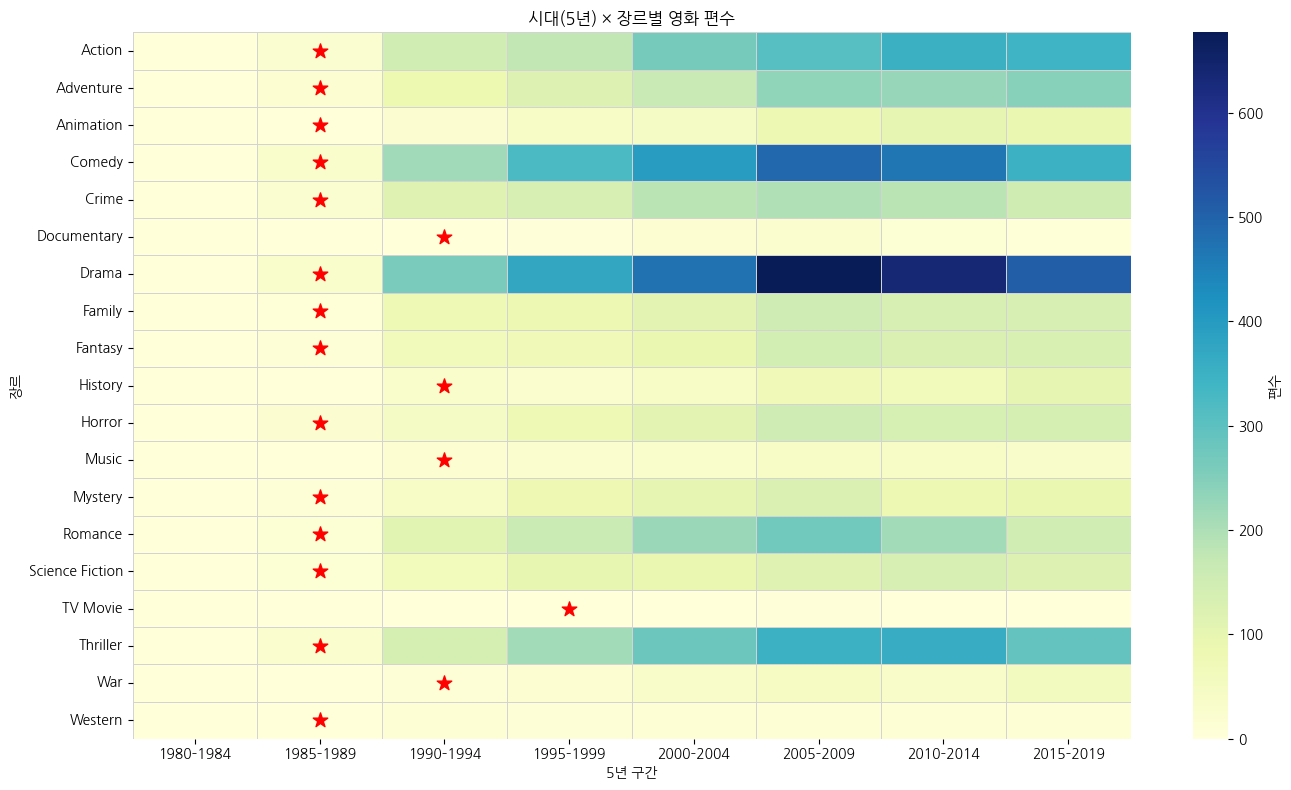

=== 장르별 최초 등장 구간 ===
Action         : 1985–1989
Adventure      : 1985–1989
Animation      : 1985–1989
Comedy         : 1985–1989
Crime          : 1985–1989
Documentary    : 1990–1994
Drama          : 1985–1989
Family         : 1985–1989
Fantasy        : 1985–1989
History        : 1990–1994
Horror         : 1985–1989
Music          : 1990–1994
Mystery        : 1985–1989
Romance        : 1985–1989
Science Fiction: 1985–1989
TV Movie       : 1995–1999
Thriller       : 1985–1989
War            : 1990–1994
Western        : 1985–1989


In [ ]:

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"] = df["release_date"].dt.year
df = df[df["year"] >= 1980].copy()

bins   = list(range(1980, 2025, 5))
labels = [f"{y}–{y+4}" for y in bins[:-1]]
df["five_year_bin"] = pd.cut(df["year"], bins=bins, labels=labels, right=True, include_lowest=True)


genre_cols = df.loc[:, "Action":"Western"].columns.tolist()

count_tbl = df.groupby("five_year_bin")[genre_cols].sum().reindex(labels).fillna(0).astype(int)


first_seen = {}
for g in genre_cols:
    nz = np.where(count_tbl[g].values > 0)[0]
    first_seen[g] = labels[nz[0]] if len(nz) else None

plt.figure(figsize=(14,8))
sns.heatmap(count_tbl.T, cmap="YlGnBu", linewidths=.5, linecolor="lightgray", cbar_kws={"label":"편수"})
plt.title("시대(5년) × 장르별 영화 편수")
plt.xlabel("5년 구간")
plt.ylabel("장르")

for gi, g in enumerate(count_tbl.columns):
    pass

for gi, g in enumerate(count_tbl.columns):
    pass


M = count_tbl.T
for gi, g in enumerate(M.index):
    nz = np.where(M.loc[g].values > 0)[0]
    if len(nz) > 0:
        fi = nz[0]
        plt.scatter(fi+0.5, gi+0.5, marker="*", s=120, color="red")

plt.tight_layout()
plt.show()


print("=== 장르별 최초 등장 구간 ===")
for g, f in first_seen.items():
    print(f"{g:15s}: {f}")


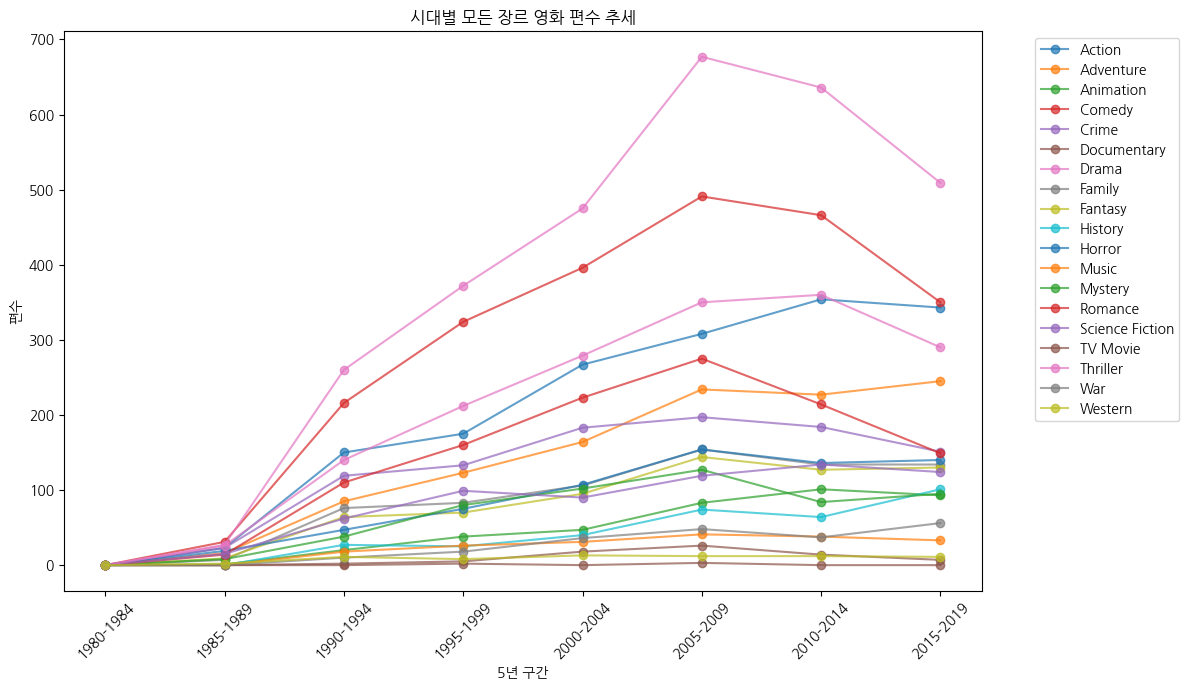

In [ ]:
plt.figure(figsize=(12,7))
for col in count_tbl.columns:
    plt.plot(count_tbl.index, count_tbl[col], marker="o", label=col, alpha=0.7)

plt.title("시대별 모든 장르 영화 편수 추세")
plt.xlabel("5년 구간")
plt.ylabel("편수")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:


def summarize_animation(df, start=1990, end=2025, step=5):
    df = df.copy()

    df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
    df["year"] = df["release_date"].dt.year
    df = df[(df["year"] >= start) & (df["year"] <= end)].copy()

    bins   = list(range(start, end + step, step))
    labels = [f"{y}–{y+step-1}" for y in bins[:-1]]
    df["period"] = pd.cut(df["year"], bins=bins, labels=labels,
                          include_lowest=True, right=True)

    totals_cnt  = df.groupby("period", observed=False).size().reindex(labels).astype(float)
    totals_perf = df.groupby("period", observed=False)["y_result"].sum().reindex(labels).astype(float)

    ani_cnt  = df.groupby("period", observed=False)["Animation"].sum().reindex(labels).fillna(0.0)
    ani_perf = df.loc[df["Animation"]==1].groupby("period", observed=False)["y_result"] \
                 .sum().reindex(labels).fillna(0.0)
    ani_mean = df.loc[df["Animation"]==1].groupby("period", observed=False)["y_result"] \
                 .mean().reindex(labels)

    share_cnt  = ((ani_cnt  / totals_cnt.replace(0, np.nan))  * 100).fillna(0.0)
    share_perf = ((ani_perf / totals_perf.replace(0, np.nan)) * 100).fillna(0.0)

    excess_pp = (share_perf - share_cnt).fillna(0.0)

    summary = pd.DataFrame({
        "count": ani_cnt,
        "count_share_%": share_cnt,
        "perf_sum": ani_perf,
        "perf_share_%": share_perf,
        "mean_y_result": ani_mean,
        "excess_perf_pp": excess_pp
    }).reindex(labels).round(2)

    return summary, labels


anim_summary, labels = summarize_animation(df, start=1990, end=2025, step=5)
print(anim_summary)


           count  count_share_%  perf_sum  perf_share_%  mean_y_result  \
period                                                                   
1990–1994     21           3.26        22          3.02           1.05   
1995–1999     38           4.93        57          6.96           1.50   
2000–2004     47           4.64        73          6.43           1.55   
2005–2009     83           6.18       122          8.56           1.47   
2010–2014    101           7.45       149          9.17           1.48   
2015–2019     93           8.39       141         10.71           1.52   
2020–2024     35          10.09        48         13.91           1.37   

           excess_perf_pp  
period                     
1990–1994           -0.24  
1995–1999            2.03  
2000–2004            1.79  
2005–2009            2.38  
2010–2014            1.72  
2015–2019            2.32  
2020–2024            3.83  


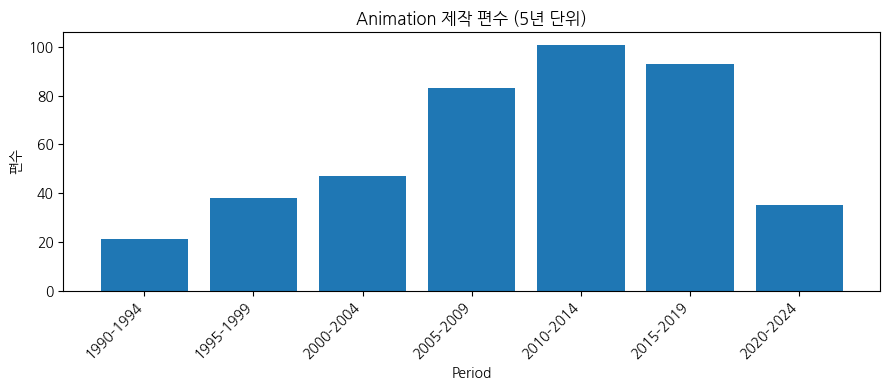

In [ ]:
# (1) 애니 제작 편수
plt.figure(figsize=(9,4))
plt.bar(anim_summary.index.astype(str), anim_summary["count"])
plt.title("Animation 제작 편수 (5년 단위)")
plt.xlabel("Period"); plt.ylabel("편수")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()



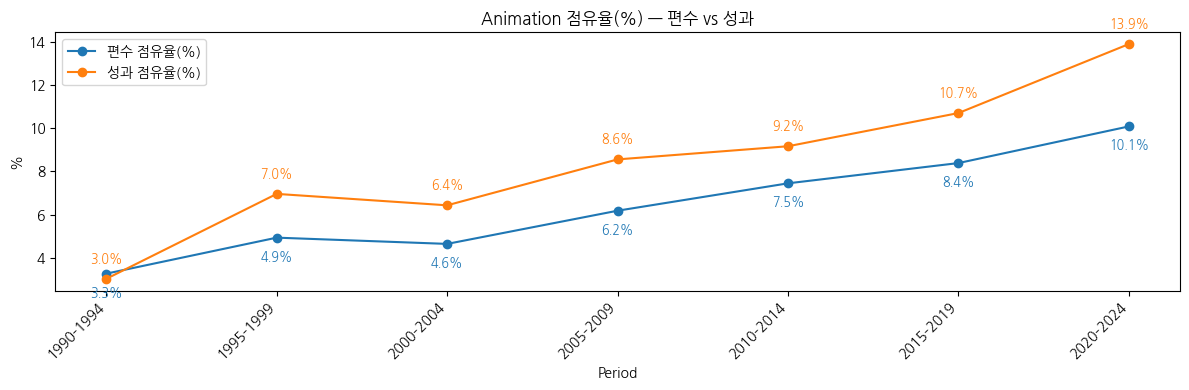

In [ ]:
plt.figure(figsize=(12,4))

plt.plot(anim_summary.index.astype(str), anim_summary["count_share_%"],
         marker="o", label="편수 점유율(%)", color="C0")
for x, y in zip(anim_summary.index.astype(str), anim_summary["count_share_%"]):
    plt.text(x, y-0.6, f"{y:.1f}%", ha="center", va="top", fontsize=9, color="C0")

plt.plot(anim_summary.index.astype(str), anim_summary["perf_share_%"],
         marker="o", label="성과 점유율(%)", color="C1")
for x, y in zip(anim_summary.index.astype(str), anim_summary["perf_share_%"]):
    plt.text(x, y+0.6, f"{y:.1f}%", ha="center", va="bottom", fontsize=9, color="C1")

plt.title("Animation 점유율(%) — 편수 vs 성과")
plt.xlabel("Period")
plt.ylabel("%")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


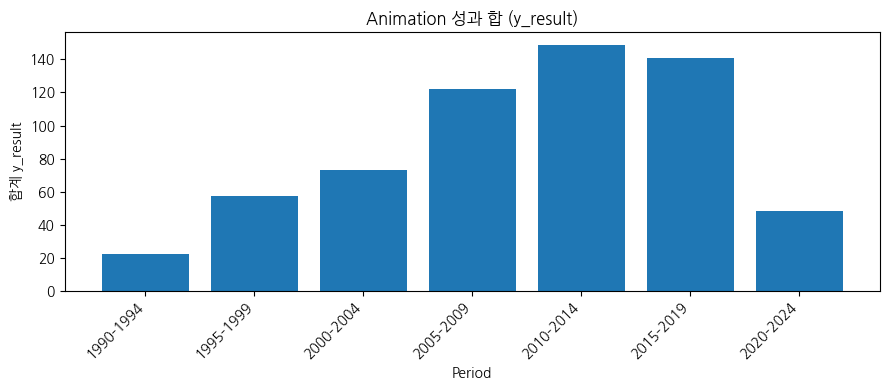

In [ ]:

plt.figure(figsize=(9,4))
plt.bar(anim_summary.index.astype(str), anim_summary["perf_sum"])
plt.title("Animation 성과 합 (y_result)")
plt.xlabel("Period"); plt.ylabel("합계 y_result")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()




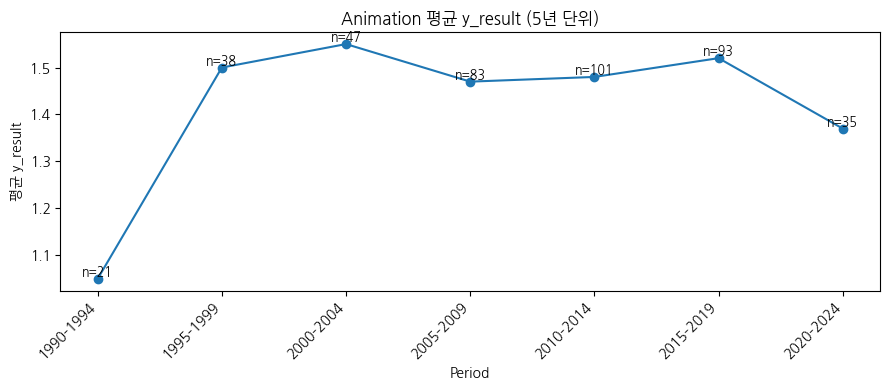

In [ ]:
xs = np.arange(len(anim_summary))
y  = anim_summary["mean_y_result"].values
n  = anim_summary["count"].values

plt.figure(figsize=(9,4))
plt.plot(xs, y, marker="o")
# 각 점 위에 표본수 표시
for xi, yi, ni in zip(xs, y, n):
    if not np.isnan(yi):
        plt.text(xi, yi, f"n={int(ni)}", ha="center", va="bottom", fontsize=9)

plt.title("Animation 평균 y_result (5년 단위)")
plt.xlabel("Period"); plt.ylabel("평균 y_result")
plt.xticks(xs, anim_summary.index.astype(str), rotation=45, ha="right")
plt.tight_layout(); plt.show()